In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [3]:
import os
for dirname, _, filenames in os.walk('kaggle_input/dataset3/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle_input/dataset3/shared_articles.csv
kaggle_input/dataset3/users_interactions.csv


In [4]:
df_shared = pd.read_csv('kaggle_input/dataset3/shared_articles.csv')
df_shared.head()

timestamp        eventType            contentId       authorPersonId  \
0  1459192779  CONTENT REMOVED -6451309518266745024  4340306774493623681   
1  1459193988   CONTENT SHARED -4110354420726924665  4340306774493623681   
2  1459194146   CONTENT SHARED -7292285110016212249  4340306774493623681   
3  1459194474   CONTENT SHARED -6151852268067518688  3891637997717104548   
4  1459194497   CONTENT SHARED  2448026894306402386  4340306774493623681   

       authorSessionId authorUserAgent authorRegion authorCountry contentType  \
0  8940341205206233829             NaN          NaN           NaN        HTML   
1  8940341205206233829             NaN          NaN           NaN        HTML   
2  8940341205206233829             NaN          NaN           NaN        HTML   
3 -1457532940883382585             NaN          NaN           NaN        HTML   
4  8940341205206233829             NaN          NaN           NaN        HTML   

                                                 url  \
0  http://www.nytimes.com/2016/03/28/business/dea...   
1  http://www.nytimes.com/2016/03/28/business/dea...   
2  http://cointelegraph.com/news/bitcoin-future-w...   
3  https://cloudplatform.googleblog.com/2016/03/G...   
4  https://bitcoinmagazine.com/articles/ibm-wants...   

                                               title  \
0  Ethereum, a Virtual Currency, Enables Transact...   
1  Ethereum, a Virtual Currency, Enables Transact...   
2  Bitcoin Future: When GBPcoin of Branson Wins O...   
3                       Google Data Center 360° Tour   
4  IBM Wants to "Evolve the Internet" With Blockc...   

                                                text lang  
0  All of this work is still very early. The firs...   en  
1  All of this work is still very early. The firs...   en  
2  The alarm clock wakes me at 8:00 with stream o...   en  
3  We're excited to share the Google Data Center ...   en  
4  The Aite Group projects the blockchain market ...   en

In [5]:
df_user = pd.read_csv('kaggle_input/dataset3/users_interactions.csv')
df_user.head()

timestamp eventType            contentId             personId  \
0  1465413032      VIEW -3499919498720038879 -8845298781299428018   
1  1465412560      VIEW  8890720798209849691 -1032019229384696495   
2  1465416190      VIEW   310515487419366995 -1130272294246983140   
3  1465413895    FOLLOW   310515487419366995   344280948527967603   
4  1465412290      VIEW -7820640624231356730  -445337111692715325   

             sessionId                                          userAgent  \
0  1264196770339959068                                                NaN   
1  3621737643587579081  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...   
2  2631864456530402479                                                NaN   
3 -3167637573980064150                                                NaN   
4  5611481178424124714                                                NaN   

  userRegion userCountry  
0        NaN         NaN  
1         NY          US  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN

In [6]:
df_user['COUNTER'] = 1 #Initially set that counter to 1

In [7]:
group_data = df_user.groupby(['contentId','eventType'])['COUNTER'].sum().reset_index() #sum function

group_data

contentId        eventType  COUNTER
0    -9222795471790223670         BOOKMARK        1
1    -9222795471790223670  COMMENT CREATED        2
2    -9222795471790223670           FOLLOW        3
3    -9222795471790223670             LIKE        4
4    -9222795471790223670             VIEW       16
...                   ...              ...      ...
7335  9217155070834564627  COMMENT CREATED        2
7336  9217155070834564627             VIEW       14
7337  9220445660318725468             LIKE        2
7338  9220445660318725468             VIEW       50
7339  9222265156747237864             VIEW        5

[7340 rows x 3 columns]

In [8]:
events_df = group_data.pivot_table(values='COUNTER', index='contentId', columns='eventType')
events_df = events_df.fillna(0)

events_df

eventType             BOOKMARK  COMMENT CREATED  FOLLOW  LIKE  VIEW
contentId                                                          
-9222795471790223670       1.0              2.0     3.0   4.0  16.0
-9216926795620865886       1.0              1.0     1.0   3.0  15.0
-9194572880052200111       2.0              1.0     1.0   4.0  21.0
-9192549002213406534       0.0              1.0     0.0   5.0  50.0
-9190737901804729417       0.0              0.0     0.0   1.0   8.0
...                        ...              ...     ...   ...   ...
 9213260650272029784       0.0              0.0     0.0   0.0  11.0
 9215261273565326920       3.0              0.0     0.0   3.0  24.0
 9217155070834564627       0.0              2.0     0.0   0.0  14.0
 9220445660318725468       0.0              0.0     0.0   2.0  50.0
 9222265156747237864       0.0              0.0     0.0   0.0   5.0

[2987 rows x 5 columns]

## Generating label column as ground truth values for our training data

In [9]:
def label(row):
   return (1* row['VIEW']) + (4*row['LIKE']) + (10*row['COMMENT CREATED']) +( 25*row['FOLLOW'] )+ (100*row['BOOKMARK'])

events_df['label'] = events_df.apply (lambda row: label(row), axis=1)

In [10]:
events_df.describe()


eventType     BOOKMARK  COMMENT CREATED       FOLLOW         LIKE  \
count      2987.000000      2987.000000  2987.000000  2987.000000   
mean          0.824573         0.539337     0.471041     1.923334   
std           2.231426         1.292221     1.076175     3.368695   
min           0.000000         0.000000     0.000000     0.000000   
25%           0.000000         0.000000     0.000000     0.000000   
50%           0.000000         0.000000     0.000000     1.000000   
75%           1.000000         1.000000     1.000000     2.000000   
max          78.000000        13.000000    14.000000    53.000000   

eventType         VIEW        label  
count      2987.000000  2987.000000  
mean         20.450619   127.770673  
std          27.199921   259.044552  
min           0.000000     1.000000  
25%           5.000000     8.000000  
50%          12.000000    43.000000  
75%          25.000000   150.000000  
max         355.000000  7907.000000

The label/ viralty score takes values from the range(1 to 7907)

In [11]:
train, test = train_test_split(events_df, test_size = 0.25)

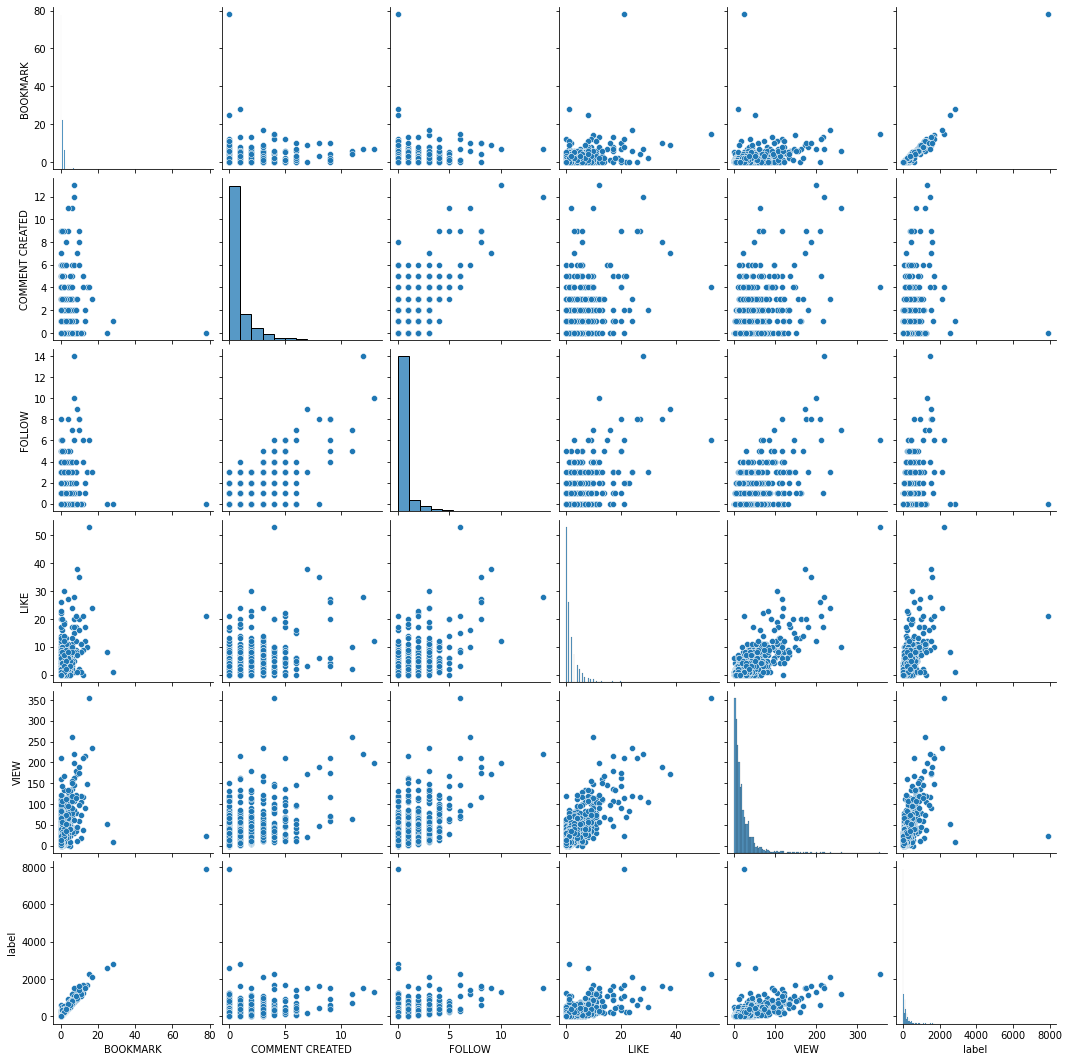

In [12]:
sns.pairplot(train)

<AxesSubplot:xlabel='eventType', ylabel='eventType'>

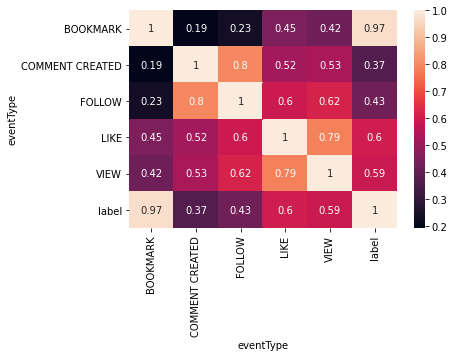

In [13]:
sns.heatmap(train.corr(), annot=True)

Label is correlated with : bookmark, like, view, follow and comment created in decreasing order.

In [14]:
train_X, train_Y = train.drop('label',axis=1) , train['label']
test_X, test_Y = test.drop('label',axis=1) , test['label']

Tring different models and comparing performace :

Linear Regression (without regularization)

Linear regression lasso regularization

Linear regresion k-fold cross validation

In [15]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import explained_variance_score

In [16]:
#Train the model using the training set
lr = LinearRegression()
lr.fit(train_X, train_Y)
lr.score(train_X,train_Y)

#Make predictions using the testing set
test_predict = lr.predict(test_X)

res = dict()
metrics = dict()

res['lr'] = lr.coef_
metrics['lr'] = r2_score(test_Y, test_predict),explained_variance_score(test_Y,test_predict)

LinAlgError: SVD did not converge in Linear Least Squares

In [108]:
metrics

{'lr': (1.0, 1.0)}

In [1]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_X, train_Y)
predict_clf = clf.predict(test_X)
print(clf.coef_)
res['lasso'] = clf.coef_
metrics['lasso'] = r2_score(test_Y, predict_clf),explained_variance_score(test_Y,predict_clf)

NameError: name 'train_X' is not defined

In [ ]:
from sklearn.linear_model import ElasticNetCV

regr.fit(train_X, train_Y)
ElasticNetCV(cv=3, random_state=0)
print(regr.coef_)
predict_regr = regr.predict(test_X)

res['cv'] = regr.coef_
metrics['cv'] = r2_score(test_Y, predict_regr),explained_variance_score(test_Y,predict_regr)